# 2 - Regression in Python

---

## A reminder of the key maths

### The data

We have gone out into the world and taken some measurements. These measurements form $(x, y)$ pairs. Last week we looked at an example where $x$ was the number of salespeople hired in a particular month and $y$ was the total number of cars sold in that same month. But these could of course represent any variables we like. 

$$
x\text{-data} = [x_1, x_2, x_3, ..., x_N] \\[0.4cm]
y\text{-data} = [y_1, y_2, y_3, ..., y_N]
$$

### The linear relationship

We decide that the $x$ and $y$ are likely to have some kind of linear relationship. We can describe this linear relationship by the eauation of a line. In general, we suggest that 

$$
y_i \approx mx_i + c
$$

where $y_i$ is the $i$th $y$-measurement and $x_i$  is the $i$th $x$-measurement. $m$ and $c$ are the gradient and intercept values. We want to find the values for $m$ and $c$ that best fit the data. 

### How good are our value of $m$ and $c$?

For a given value of $m$ and $c$ our 'prediction' for what $y_i$ should be is 

$$
mx_i + c
$$

however, the true measured value is $y_i$. The difference between our prediction and the real value is 

$$
\begin{align}
\text{error} &= \text{real value} \; - \text{prediction} \\
&= y_i - (mx_i+c) \\
&= y_i - mx_i - c
\end{align}
$$

This could be positive or negative, depending on whether the real value or our prediction is bigger. We therefore square this, because we really care about the size of this difference, not the sign. 

$$
(\text{real value} \; - \text{prediction})^2 = (y_i - mx_i - c)^2 
$$

We then look at this squared error for every data point we have collected and add it up

$$
\begin{align}
\text{total error} = (y_1 - mx_1 - c)^2  \, + \, (y_2 - mx_2 - c)^2 \, + \, ...  \\
\end{align}
$$

To keep things neat, mathematicians will often write this using summation notation

$$
\text{total error} = \sum_{i=1}^{N} (y_i - mx_i - c)^2 
$$

### Finding the best $m$ and $c$

For every value of $m$ and $c$ there is an associated error, which we can calculate using the equation above. We can find the best value of $m$ and $c$ by adjusting them and finding the values that minimise our total error. In practice, the way we do this is by finding the place where the derivitive of the error with respect to $m$ and $c$ is zero. 

## Exercise 1 

Play with the paramters $m$ and $c$ in the graph below to remind yourself of the role they play. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
np.set_printoptions(precision=3, linewidth=500, threshold=500, suppress=True)
%matplotlib notebook

In [5]:
%matplotlib notebook

In [4]:
from scripts.regression2 import *

<IPython.core.display.Javascript object>


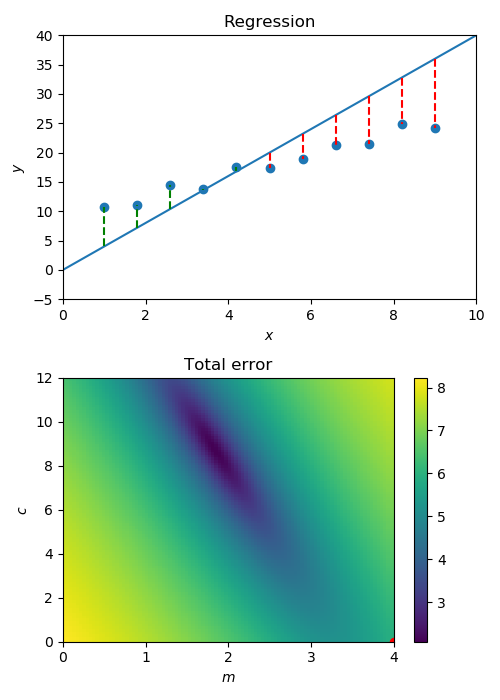

interactive(children=(FloatSlider(value=0.0, description='c', max=12.0, step=0.01), Output()), _dom_classes=('…

interactive(children=(FloatSlider(value=4.0, description='m', max=4.0, step=0.01), Output()), _dom_classes=('w…

In [6]:
make_graph_1()

## In this notebook we will learn how to use Python to find the best values for $m$ and $c$ without having to explicitly code any maths

---

## Let's create some toy data

For the purpose of this notebook we will create our own data with a 'known' true value for the gradient and intercept, which we will set. We will then try to recover those true values using regression.

The function `np.linspace(a, b, N)` creates a numpy array of `N` evenly spaced numbers between `a` and `b`. 

### Exercise 2

Play with different parameters for `a`, `b` and `N`. What do you notice?

In [7]:
a = 0
b = 10
N = 11
np.linspace(a, b, N)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

For our example we will use `a=0, b=10` and `N=11`

In [8]:
a = 0                       # numbers will start from here
b = 10                      # numbers will end here
N = 11                      # we will create 11 data points
x = np.linspace(0, 10, N)   # create an array of 11 evenly spaced numbers between 0 and 10
x

Next we will set some 'true' values for the gradient and intercept

In [9]:
# these will be the 'true' values of the gradient and intercept
c = 8   # the intercept
m = 2   # the grdaient

When we multiply a numpy array by a number we get a new array where each element is multiplied by that number. Similarly, when we add a constant to a numpy array every element gets that constant added to it. 

In [10]:
# each value of y will be m times x plus c
y = m * x + c 

In [18]:
print('x = ', x)
print('y = ', y)

x =  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
y =  [ 8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28.]


<IPython.core.display.Javascript object>


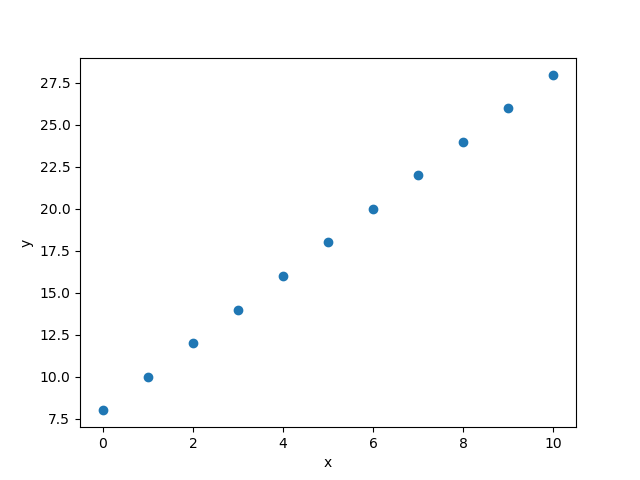

Text(0, 0.5, 'y')

In [19]:
# let's plot this data to see what we've made so far
plt.figure()       # create a new figure
plt.scatter(x, y)  # scatter the data points x and y
plt.xlabel('x')    # add an x-label
plt.ylabel('y')    # add a y-label

## Adding noise

At this stage in the process we have a perfect straight line. In reality, we rarely measure two variables that have a perfect linear relationship. The world is messy, and we almost always have what's called 'noise' in our data. This could be from measurement error, or random fluctuation or both. 

In python we can simulate random noise by using the module `np.random`. This allows us to generate random numbers. Today we will focus on 'normal random numbers'. 

### The normal distribution

The normal distribution is an example of a *probability distribution*. We use probability distributions when describing continuous random variables. Take this example. 

Q. A random person is selected from a population and their height is measured *perfectly*. What is the probability that they have a height of *exactly* 1.7m?

A. Zero! The probability of having *exactly* any height musts be zero. There are infinitely more other hieghts they could have, like 1.7000001m for example. 

When talking about random varibles that are continuous it only makes sense to speak about the probability of being between two values. A perfectly valid question we could ask is what is the probability of being between 1.7 and 1.8m. A probability distribution 



<IPython.core.display.Javascript object>


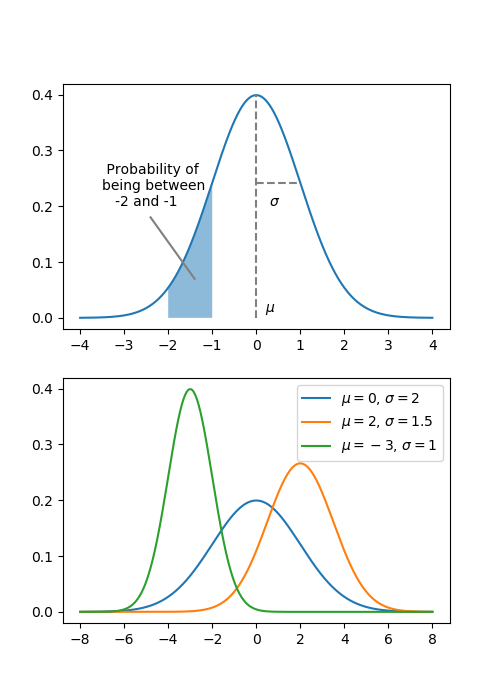

In [32]:
make_graph_2()